<a href="https://colab.research.google.com/github/dfx-rick/binary_classifier_ship_truck/blob/main/ship_or_truck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import pickle


In [2]:
  #Importing the CIFAR10 dataset from tensorflow library
  ds= tf.keras.datasets.cifar10
  (x_train_m,y_train),(x_test_m, y_test)=ds.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
#print statements to verify the shape of the data provided
print(x_train_m.shape)
print(y_train.shape)
y_train.dtype

(50000, 32, 32, 3)
(50000, 1)


dtype('uint8')

In [3]:
#Normalizing the training set and reshaping the labels to single dimension
x_train_m=x_train_m/255
x_test= x_test_m/255
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
images=np.zeros((10000,32,32,3))#Initializing as numpy arrays
ptr=0
label=np.zeros(10000, dtype='uint8')#Initializing as numpy arrays with similar datatype as y_train
#for loop to go through the images in training data and seperate the images of ship and truck from the rest 
for i in range(len(x_train_m)):
  if(y_train[i]>7):
    images[ptr]=x_train_m[i]
    label[ptr]=y_train[i]-8
    ptr=ptr+1

label=label.reshape(-1,)#reshaping the labels to single dimension
images.shape

(10000, 32, 32, 3)

1
(10000,)
10000


array([1, 1, 0, 1, 1], dtype=uint8)

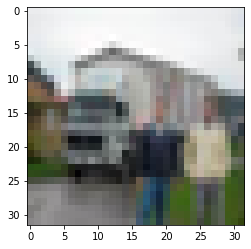

In [ ]:
plt.imshow(images[5])
print(label[5])
print(label.shape)
print(ptr)
label[:5]

In [5]:
#Building a Convolutional Neural Network
model = models.Sequential([
          layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(128, (3,3), activation='relu'),
          layers.MaxPooling2D((2,2)),
          layers.Dropout(0.3),
          layers.Flatten(),
          layers.Dense(120, activation='relu'),
          layers.Dense(84, activation='relu'),
          layers.Dense(42, activation='relu'),
          layers.Dense(1, activation='sigmoid')                           
])


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(images, label, epochs=10,batch_size=512, validation_split=0.1)#fitting the model to the given training data with a 10% split in data for validation

Epoch 1/10
18/18 [==============================] - 12s 614ms/step - loss: 0.6273 - accuracy: 0.6533 - val_loss: 0.6071 - val_accuracy: 0.6470
Epoch 2/10
18/18 [==============================] - 11s 605ms/step - loss: 0.5244 - accuracy: 0.7453 - val_loss: 0.4442 - val_accuracy: 0.7960
Epoch 3/10
18/18 [==============================] - 11s 604ms/step - loss: 0.4388 - accuracy: 0.7981 - val_loss: 0.3896 - val_accuracy: 0.8220
Epoch 4/10
18/18 [==============================] - 11s 605ms/step - loss: 0.3877 - accuracy: 0.8297 - val_loss: 0.3891 - val_accuracy: 0.8200
Epoch 5/10
18/18 [==============================] - 11s 603ms/step - loss: 0.3530 - accuracy: 0.8488 - val_loss: 0.2944 - val_accuracy: 0.8710
Epoch 6/10
18/18 [==============================] - 11s 604ms/step - loss: 0.3094 - accuracy: 0.8716 - val_loss: 0.2593 - val_accuracy: 0.8910
Epoch 7/10
18/18 [==============================] - 11s 604ms/step - loss: 0.2812 - accuracy: 0.8850 - val_loss: 0.2308 - val_accuracy: 0.9030

In [8]:
model.save('my_model.h5')

In [9]:
image=np.zeros((10000,32,32,3))
ptr1=0
labels=np.zeros(10000, dtype='uint8')
for j in range(len(x_train_m)):
  if(y_train[j]>7):
    image[ptr1]=x_train_m[j]
    labels[ptr1]=y_train[j]-8
    ptr1=ptr1+1

In [10]:
pred = model.predict(image)

In [11]:
result = []

for i in range(pred.shape[0]):
  max1=0.0
  pos=0
  for j in range(pred.shape[1]):
    if pred[i][j] > max1:
      max1 = pred[i][j]
      pos = j
  result.append(pos)

In [12]:
scores = model.evaluate(image, labels, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 7.70%


In [ ]:
labels = {'ship':0,'truck':1}
with open('labels.json', 'wb') as iw:
    pickle.dump(labels, iw)

In [ ]:
pickle.dump()